In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import CLA

np.random.seed(42)

%matplotlib inline

In [77]:
## NUMBER OF ASSETS  
n_assets = 10

## NUMBER OF OBSERVATIONS  
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

lB = np.full([1,n_assets],0).T #lower bound on weights
uB = np.full([1,n_assets],1).T #upper bound on weights

mu = np.mean(return_vec,axis=1).T.reshape(-1,1)
covar = np.cov(return_vec)
covar = np.tril(covar, k=0)

In [170]:
## NUMBER OF ASSETS  
n_assets = 10

## NUMBER OF OBSERVATIONS  
n_obs = 1000

return_vec = np.empty([n_obs,n_assets])

for i in range(n_assets):
    return_vec[:,i] = np.random.normal(np.random.uniform(0,.1),np.random.uniform(0,.1),n_obs)
    
lB = np.full([1,n_assets],0).T #lower bound on weights
uB = np.full([1,n_assets],1).T #upper bound on weights

mu = np.mean(return_vec,axis=0).T.reshape(-1,1)
covar = np.cov(return_vec.T)
covar = np.tril(covar, k=0)
    

In [171]:
covar.shape

(10, 10)

In [172]:
cla=CLA.CLA(mu,covar,lB,uB)

In [173]:
cla.solve()

In [163]:
 a=np.zeros((cla.mean.shape[0]),dtype=[('id',int),('mu',float)])
b=[cla.mean[i][0] for i in range(cla.mean.shape[0])]
a[:]=list(zip(range(cla.mean.shape[0]),b))
b=np.sort(a,order='mu')
i,w=b.shape[0],np.copy(cla.lB)

In [168]:
w[b[9][0]]=cla.uB[b[9][0]]

In [169]:
w

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [135]:
mu,sigma,weights=cla.efFrontier(100)

In [174]:
sr,w_sr=cla.getMaxSR()

In [175]:
print(np.dot(np.dot(w_sr.T,cla.covar),w_sr)[0,0]**.5,sr)

0.022442123461804887 1.105270883209088


In [176]:
print(w_sr)

[[0.23606798]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [139]:
def plot2D(x,y,xLabel='',yLabel='',title='',pathChart=None):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1) #one row, one column, first plot
    ax.plot(x,y,color='blue')
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel,rotation=90)
    plt.xticks(rotation='vertical')
    plt.title(title)
    if pathChart==None:
        plt.show()
    else:
        plt.savefig(pathChart)
    plt.clf() # reset pylab
    return

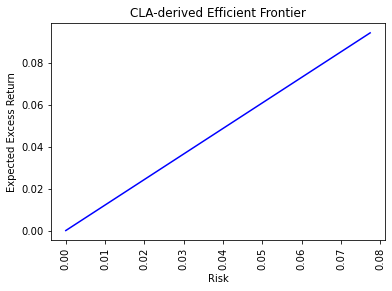

<Figure size 432x288 with 0 Axes>

In [140]:
plot2D(sigma,mu,'Risk','Expected Excess Return','CLA-derived Efficient Frontier')

In [178]:
cla.w[-1]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])